In [1]:
import pickle
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
import sys
import os
address = (os.sep).join(os.getcwd().split(os.sep)[:-3])
print(address)
sys.path.append(address)
print(sys.path)
import util.items as items
import util.scraper as scraper
import util.trading_systems as ts

/home/makoa/School/osrs_research
['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/makoa/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/home/makoa/.local/lib/python3.6/site-packages/IPython/extensions', '/home/makoa/.ipython', '/home/makoa/School/osrs_research']


In [4]:
with open('all.pickle','rb') as f:
    results = pickle.load(f)

In [14]:
results['Abyssal_whip'].keys()

dict_keys(['sma', 'buyAndHold', 'startMAE', 'predictions', 'persist', 'endMAE', 'sma_model', 'stochOscil', 'numPrices', 'budget', 'momentum_model', 'testPrices', 'momentum', 'endLoss', 'numEpochs', 'startLoss', 'model_opt', 'perfect', 'opt_params', 'item', 'model', 'stochOscil_model'])

In [15]:
for item in results:
    r = results[item]
    test_prices = r['testPrices']
    budget = test_prices[0]*101-1
    y_pred = r['predictions']
    best = [-1000,1,1]
    for buyDays in range(1,8):
        for sellDays in range(1,8):
            buySigs = [y_pred[i+buyDays] >= y_pred[i] for i in range(0, len(y_pred)-buyDays)]
            buySigs = buySigs + [False]*buyDays
            for i in range(len(buySigs)):
                if buySigs[i]:
                    for j in range(1,buyDays-1):
                        buySigs[i+j] = False
            sellSigs = [y_pred[i+sellDays] <= y_pred[i] for i in range(0, len(y_pred)-sellDays)]
            sellSigs = sellSigs + [False]*sellDays
            for i in range(len(sellSigs)):
                if sellSigs[i]:
                    for j in range(1,sellDays-1):
                        sellSigs[i+j] = False
            profit = ts.modelProfit(buySigs, sellSigs, test_prices, budget)
            if profit[-1]>best[0]:
                best = [profit[-1],buyDays,sellDays]
    results[item]['model_opt_days'] = best[0]
    results[item]['buyDays'] = best[1]
    results[item]['sellDays'] = best[2]

In [20]:
modelProfs = [(item,results[item]['model_opt_days']) for item in results]
modelProfs = sorted(modelProfs, key=lambda x: x[1], reverse=True)

In [21]:
pprint(modelProfs[0:10])

[('Empty_sack', 862.9966832504145),
 ('Empty_fishbowl', 511.0),
 ('Cadavaberry_seed', 511.0),
 ('Ring_mould', 178.5558312655087),
 ('Basket', 174.72470978441126),
 ('Unlit_torch', 143.0),
 ('Air_tiara', 132.0),
 ('Noose_wand', 95.0),
 ('Iron_dagger', 87.6887417218543),
 ('Jute_seed', 74.0)]


In [24]:
modVSpers = [(item,results[item]['model_opt_days']-results[item]['persist']) for item in results ]
modVSbah = [(item,results[item]['model_opt_days']-results[item]['buyAndHold']) for item in results ]
modVSpers = sorted(modVSpers, key=lambda x: x[1], reverse=True)
modVSbah = sorted(modVSbah, key=lambda x: x[1], reverse=True)

In [26]:
pprint(modVSpers[0:10])

[('Empty_sack', 862.8598673300165),
 ('Cadavaberry_seed', 511.9651741293532),
 ('Empty_fishbowl', 511.62),
 ('Basket', 175.66169154228854),
 ('Unlit_torch', 143.74834437086093),
 ('Air_tiara', 125.72883597883597),
 ('Ring_mould', 102.56823821339951),
 ('Noose_wand', 95.66556291390728),
 ('Iron_dagger', 77.65121412803532),
 ('Jute_seed', 73.41768292682927)]


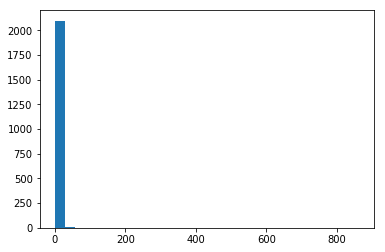

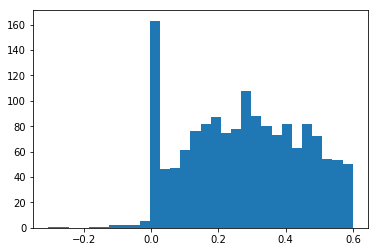

In [27]:
plt.hist([a[1] for a in modVSpers],30)
plt.show()
plt.hist([a[1] for a in modVSpers if a[1]>-6 and a[1]<.6],30)
plt.show()

In [30]:
modVSperf = [(item,results[item]['model_opt_days']-results[item]['perfect']) for item in results ]
modVSperf = sorted(modVSperf, key=lambda x: x[1], reverse=True)

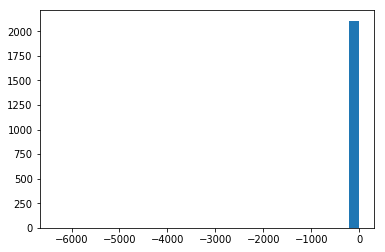

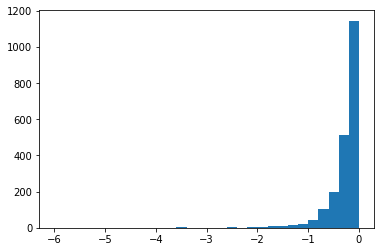

In [31]:
plt.hist([a[1] for a in modVSperf],30)
plt.show()
plt.hist([a[1] for a in modVSperf if a[1]>-6 and a[1]<.6],30)
plt.show()

In [32]:
numProfModels = len([a for a in modelProfs if a[1]>0])
numProfmodVSpers = len([a for a in modVSpers if a[1]>0])
numProfmodVSbah = len([a for a in modVSbah if a[1]>0])
numProfmodVSperf = len([a for a in modVSperf if a[1]>0])

In [33]:
print(len(results))
print(numProfModels/len(results))
print(numProfmodVSpers/len(results))
print(numProfmodVSbah/len(results))
print(numProfmodVSperf/len(results))

2115
0.9593380614657211
0.9295508274231679
0.9333333333333333
0.00047281323877068556
